In [17]:
from scipy.optimize import minimize
import math
from random import *
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [18]:
def roundAngle(num):
    n = (num-math.pi/4)/(2*math.pi)
    n = n*8
    n = round(n)%8
    n = int(n*45)
    return n

def getchairClassroom():
    return chairClassroom

In [30]:
def classSetup(classx, classy, wallsGrid, numChairs, numTables, tableL, tableW):
    global class_x
    global class_y
    global nChairs
    global nTables
    global tableLength
    global tableWidth
    global table_long
    global table_short
    #table: index 0 is short length, index 1 is long length
    global table
    global walls
    global chairs
    global chair_l
    global tables
    
    global classroom
    global chairClassroom
    global available
    global chair_placement
    global table_placement_ew
    global table_placement_ns
    
    class_x = classx
    class_y = classy
    nChairs = numChairs
    nTables = numTables
    tableLength = tableL
    tableWidth = tableW
    
    if tableLength < tableWidth:
        table_long = tableWidth
        table_short = tableLength
    else:
        table_long = tableLength
        table_short = tableWidth
    table = [int(table_short),int(table_long)]
    walls = []
    chairs = []
    chair_l = 1
    tables = []

    classroom = [[0 for i in range(class_x)] for j in range(class_y)]
    chairClassroom = [[0 for i in range(class_x)] for j in range(class_y)]
    chair_placement = [[1 for i in range(class_x)] for j in range(class_y)]
    available = [[1 for i in range(class_x)] for j in range(class_y)]
    for i in range(class_y):
        chair_placement[i][class_x-1] = 0       
    for j in range(class_x):
        chair_placement[class_y-1][j] = 0  
    table_placement_ns = [[1 for i in range(class_x)] for j in range(class_y)]
    table_placement_ew = [[1 for i in range(class_x)] for j in range(class_y)]
    for i in range(class_y):
        for j in range(class_x):
            if j >= class_x-(table_long-1) or i >= class_y-(table_short-1):
                table_placement_ew[i][j] = 0
    for i in range(class_y):
        for j in range(class_x):
            if j >= class_x-(table_short-1) or i >= class_y-(table_long-1):
                table_placement_ns[i][j] = 0
    for i in range(len(wallsGrid)):
            for j in range(len(wallsGrid[0])):
                if wallsGrid[i][j] == 1:
                    addWall(i,j)

In [31]:
def addChair(x,y,d):
    global classroom
    global chairClassroom
    global chair_placement
    global table_placement_ew
    global table_placement_ns
    global chairs
    
    available = sum(x1.count(1) for x1 in chair_placement)
    if available <= 0:
        return False

    #update classroom
    for i in range(y, y+chair_l):
        for j in range(x,x+chair_l):
            classroom[i][j] = 2
            chairClassroom[i][j] = d

    #update table_placement_ns
    for i in range(y-table[1], y+chair_l+1):
        for j in range(x-table[0], x+chair_l+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x and table_placement_ns[i][j]!=0:
                if i >= y-(table[1]-1) and i < y+chair_l and j >= x-(table[0]-1) and j < x+chair_l:
                    table_placement_ns[i][j] = 0
                elif(table_placement_ns[i][j] != 0):
                    #the way chairs face are priortized
                    #the edge of the table is deprioritized 
                    if j == x+chair_l and i > y-table[1] and i < y+chair_l:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                        if i != y-table[1]+1 and i != y+chair_l-1:
                            table_placement_ns[i][j] = table_placement_ns[i][j] + 2
                        if d>=315 or d<=45:
                            table_placement_ns[i][j] = table_placement_ns[i][j] + 10
                    if i == y-table[1] and j > x-table[0] and j < x+chair_l:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                        if j != x-table[0]+1 and j != x+chair_l-1:
                            table_placement_ns[i][j] = table_placement_ns[i][j] + 2
                        if d>=45 and d<=135:
                            table_placement_ns[i][j] = table_placement_ns[i][j] + 9
                    if j == x-table[0] and i > y-table[1] and i < y+chair_l:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                        if i != y-table[1]+1 and i != y+chair_l-1:
                            table_placement_ns[i][j] = table_placement_ns[i][j] + 2
                        if d>=135 and d<=225:
                            table_placement_ns[i][j] = table_placement_ns[i][j] + 10
                    if i == y+chair_l and j > x-table[0] and j < x+chair_l: 
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                        if j != x-table[0]+1 and j != x+chair_l-1:
                            table_placement_ns[i][j] = table_placement_ns[i][j] + 2
                        if d>=225 and d<=315:
                            table_placement_ns[i][j] = table_placement_ns[i][j] + 9

    #update table_placement_ew
    for i in range(y-table[0], y+chair_l+1):
        for j in range(x-table[1], x+chair_l+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x and table_placement_ew[i][j]!=0:
                if  i >= y-(table[0]-1) and i < y+chair_l and j >= x-(table[1]-1) and j < x+chair_l:
                    table_placement_ew[i][j] = 0
                elif(table_placement_ew[i][j] != 0):
                    if j == x+chair_l and i > y-table[0] and i < y+chair_l:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                        if i != y-table[0]+1 and i != y+chair_l-1:
                            table_placement_ew[i][j] = table_placement_ew[i][j] + 2
                        if (d>=315 or d<=45):
                            table_placement_ew[i][j] = table_placement_ew[i][j] + 9
                    if i == y-table[0] and j > x-table[1] and j < x+chair_l:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                        if j != x-table[1]+1 and j != x+chair_l-1:
                            table_placement_ew[i][j] = table_placement_ew[i][j] + 2
                        if d>=45 and d<=135:
                            table_placement_ew[i][j] = table_placement_ew[i][j] + 10
                    if j == x-table[1] and i > y-table[0] and i < y+chair_l:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                        if i != y-table[0]+1 and i != y+chair_l-1:
                            table_placement_ew[i][j] = table_placement_ew[i][j] + 2
                        if d>=135 and d<=225:
                            table_placement_ew[i][j] = table_placement_ew[i][j] + 9
                    if i == y+chair_l and j > x-table[1] and j < x+chair_l:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                        if j != x-table[1]+1 and j != x+chair_l-1:
                            table_placement_ew[i][j] = table_placement_ew[i][j] + 2
                        if d>=225 and d<=315:
                            table_placement_ew[i][j] = table_placement_ew[i][j] + 10

    #change this
    #update chair_placement
    for i in range(class_y):
        for j in range(class_x):
            if math.sqrt((i-y)**2 + (j-x)**2) < 1:
                chair_placement[i][j] = 0

    #add chair
    chairs.append([x,y,d])
    
    return True

In [32]:
def addTable():
    global classroom
    global table_placement_ew
    global table_placement_ns
    global tables
    c = []
    
    #find highest position number in table_placement_ns
    max_ns = 0
    for i in range(class_y-(table[1]-1)):
        for j in range(class_x-(table[0]-1)):
            if table_placement_ns[i][j] > max_ns:
                max_ns = table_placement_ns[i][j]
    #find highest position number in table_placeent_ew
    max_ew = 0
    for i in range(class_y-(table[0]-1)):
        for j in range(class_x-(table[1]-1)):
            if table_placement_ew[i][j] > max_ew:
                max_ew = table_placement_ew[i][j]

    #compare the highest position number in ns and ew
    if (max_ns >= max_ew):
        t = table_placement_ns
        table_x = table[0]
        table_y = table[1]
        m = max_ns
        ns_table = 1
    elif (max_ew > max_ns):
        t = table_placement_ew
        table_x = table[1]
        table_y = table[0]
        m = max_ew
        ns_table = 0
    if m == 1:
        return True

    #count how many available positions there are for the specific table orientation
    available = sum(x.count(m) for x in t)
    if available <= 0:
        return False
    
    #rng for which position
    num = math.ceil(random()*available)
    #put at that position
    for i in range(class_y-(table_y-1)):
        for j in range(class_x-(table_x-1)):
            if t[i][j] == m:
                num -= 1
            if num == 0:
                x = j
                y = i
                break
        if num == 0:
            break

    #find all the chairs
    for i in range(y-1, y+table_y+1):
        for j in range(x-1, x+table_x+1):
            if i >= 0 and i < len(classroom) and j >= 0 and j < len(classroom[0]):
                if classroom[i][j] == 2:
                    for chair in chairs:
                        if j == chair[0] and i == chair[1]:
                            c.append([j,i,chair[2]])
    
    #subtract from the squares around it
    for chair in c:
        y2 = chair[1]
        x2 = chair[0]
        d = chair[2]
        #update table_placement_ns
        for i in range(y2-table[1], y2+chair_l+1):
            for j in range(x2-table[0], x2+chair_l+1):
                if i >= 0 and i < class_y and j >= 0 and j < class_x and table_placement_ns[i][j]!=0:
                    if(table_placement_ns[i][j] != 0):
                        #the way chairs face are priortized
                        #the edge of the table is deprioritized 
                        if j == x2+chair_l and i > y2-table[1] and i < y2+chair_l:
                            table_placement_ns[i][j] = table_placement_ns[i][j] - 1
                            if i != y2-table[1]+1 and i != y2+chair_l-1:
                                table_placement_ns[i][j] = table_placement_ns[i][j] - 2
                            if d>=315 or d<=45:
                                table_placement_ns[i][j] = table_placement_ns[i][j] - 10
                        if i == y2-table[1] and j > x2-table[0] and j < x2+chair_l:
                            table_placement_ns[i][j] = table_placement_ns[i][j] - 1
                            if j != x2-table[0]+1 and j != x2+chair_l-1:
                                table_placement_ns[i][j] = table_placement_ns[i][j] - 2
                            if d>=45 and d<=135:
                                table_placement_ns[i][j] = table_placement_ns[i][j] - 9
                        if j == x2-table[0] and i > y2-table[1] and i < y2+chair_l:
                            table_placement_ns[i][j] = table_placement_ns[i][j] - 1
                            if i != y2-table[1]+1 and i != y2+chair_l-1:
                                table_placement_ns[i][j] = table_placement_ns[i][j] - 2
                            if d>=135 and d<=225:
                                table_placement_ns[i][j] = table_placement_ns[i][j] - 10
                        if i == y2+chair_l and j > x2-table[0] and j < x2+chair_l: 
                            table_placement_ns[i][j] = table_placement_ns[i][j] - 1
                            if j != x2-table[0]+1 and j != x2+chair_l-1:
                                table_placement_ns[i][j] = table_placement_ns[i][j] - 2
                            if d>=225 and d<=315:
                                table_placement_ns[i][j] = table_placement_ns[i][j] - 9

        #update table_placement_ew
        for i in range(y2-table[0], y2+chair_l+1):
            for j in range(x2-table[1], x2+chair_l+1):
                if i >= 0 and i < class_y and j >= 0 and j < class_x and table_placement_ew[i][j]!=0:
                    if(table_placement_ew[i][j] != 0):
                        if j == x2+chair_l and i > y2-table[0] and i < y2+chair_l:
                            table_placement_ew[i][j] = table_placement_ew[i][j] - 1
                            if i != y2-table[0]+1 and i != y2+chair_l-1:
                                table_placement_ew[i][j] = table_placement_ew[i][j] - 2
                            if (d>=315 or d<=45):
                                table_placement_ew[i][j] = table_placement_ew[i][j] - 9
                        if i == y2-table[0] and j > x2-table[1] and j < x2+chair_l:
                            table_placement_ew[i][j] = table_placement_ew[i][j] - 1
                            if j != x2-table[1]+1 and j != x2+chair_l-1:
                                table_placement_ew[i][j] = table_placement_ew[i][j] - 2
                            if d>=45 and d<=135:
                                table_placement_ew[i][j] = table_placement_ew[i][j] - 10
                        if j == x2-table[1] and i > y2-table[0] and i < y2+chair_l:
                            table_placement_ew[i][j] = table_placement_ew[i][j] - 1
                            if i != y2-table[0]+1 and i != y2+chair_l-1:
                                table_placement_ew[i][j] = table_placement_ew[i][j] - 2
                            if d>=135 and d<=225:
                                table_placement_ew[i][j] = table_placement_ew[i][j] - 9
                        if i == y2+chair_l and j > x2-table[1] and j < x2+chair_l:
                            table_placement_ew[i][j] = table_placement_ew[i][j] - 1
                            if j != x2-table[1]+1 and j != x2+chair_l-1:
                                table_placement_ew[i][j] = table_placement_ew[i][j] - 2
                            if d>=225 and d<=315:
                                table_placement_ew[i][j] = table_placement_ew[i][j] - 10
    
    #update classroom
    for i in range(y, y+table_y):
        for j in range(x,x+table_x):
            classroom[i][j] = 1
    
            
    #update table_placement_ns
    for i in range(y-(table[1]-1), y+table[ns_table]):
        for j in range(x-(table[0]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ns[i][j] = 0

    #update table_placement_ew
    for i in range(y-(table[0]-1), y+table[ns_table]):
        for j in range(x-(table[1]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ew[i][j] = 0

    #add table

    tables.append([x, y, ns_table])
    return True

In [33]:
def addWall(x,y):
    global classroom
    global walls
    global table_placement_ns
    global table_placement_ew
    global available
    
    #update classroom
    classroom[x][y] = 3
    walls.append([x,y])

    #update table_placement_ns
    for i in range(y-(table_long-1), y+1):
        for j in range(x-(table_short-1), x+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ns[j][i] = 0

    #update table_placement_ew
    for i in range(y-(table_short-1), y+1):
        for j in range(x-(table_long-1), x+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ew[j][i] = 0

    #update chair_placement
    for i in range(y-(chair_l-1),y+1):
        for j in range(x-(chair_l-1),x+1):
            if(i>=0 and j>=0):
                chair_placement[j][i] = 0
                available[j][i] = 0

In [34]:
def validInput(classx,classy,wallsGrid,numChairs,numTables,tableL,tableW,chair_l):
    sqft = classx*classy
    wallCount = sum(x1.count(1) for x1 in wallsGrid)
    tableCount = tableL*tableW*numTables
    
    if (sqft-wallCount)/numChairs < 25:
        return False
    
    if (wallCount+tableCount+numChairs*chair_l**2 > sqft*0.7):
        return False
    
    return True

def validChair(c, grid):
    for chair in c:
        if grid[chair[1]][chair[0]] == 1:
            return False
    return True

def validTable(tablenum,tableL,tableW):
    tableCount = sum(x1.count(2) for x1 in classroom)/(tableL*tableW)
    if(tableCount==tablenum):
        return False
    return True

In [35]:
def clearRoom():
    global chairs
    global tables
    global walls
    global classroom
    global chair_placement
    global table_placement_ew
    global table_placement_ns
    
    chairs = []
    tables = []
    walls = []
    classroom = [[0 for i in range(class_x)] for j in range(class_y)]
    chair_placement = [[1 for i in range(class_x)] for j in range(class_y)]
    available = [[1 for i in range(class_x)] for j in range(class_y)]
    for i in range(class_y):
        chair_placement[i][class_x-1] = 0       
    for j in range(class_x):
        chair_placement[class_y-1][j] = 0  
    table_placement_ns = [[1 for i in range(class_x)] for j in range(class_y)]
    table_placement_ew = [[1 for i in range(class_x)] for j in range(class_y)]
    for i in range(class_y):
        for j in range(class_x):
            if j >= class_x-(table_long-1) or i >= class_y-(table_short-1):
                table_placement_ew[i][j] = 0
    for i in range(class_y):
        for j in range(class_x):
            if j >= class_x-(table_short-1) or i >= class_y-(table_long-1):
                table_placement_ns[i][j] = 0

In [36]:
def optimizerSetup():
    global fstudents
    global bnds
    global cons
    global guess
    global chair_l
    global class_x
    global class_y
    
    bnds = ()
    cons = []
    guess = []
    #fake students prevent students from facing the wall
    r = 4
    fstudents = []
    
    for i in range(-r,class_x-chair_l+1,2):
        fstudents.append(i)
        fstudents.append(-r)
        fstudents.append(i)
        fstudents.append(class_y-chair_l+r)
    for i in range(-r,class_y-chair_l+1,2):
        fstudents.append(-r)
        fstudents.append(i)
        fstudents.append(class_x-chair_l+r)
        fstudents.append(i)
    for i in range(1,r):
        fstudents.append(class_x-chair_l+i)
        fstudents.append(-r+i)
        fstudents.append(class_x-chair_l+r-i)
        fstudents.append(class_y-chair_l+i)
        fstudents.append(-i)
        fstudents.append(class_y-chair_l+r-i)
        fstudents.append(-r+i)
        fstudents.append(-i)
    
    x_bnd = (0,class_x-chair_l)
    y_bnd = (0,class_y-chair_l)
    d_bnd = (0,4*math.pi)
    for i in range(nChairs):
        bnds = bnds + (x_bnd,y_bnd,d_bnd)

    for i in range(nChairs):
        xtemp = random()*(class_x - chair_l) 
        ytemp = random()*(class_y - chair_l) 
        while(available[round(ytemp)][round(xtemp)] == 0):
            xtemp = random()*(class_x-1 - .8) + .4
            ytemp = random()*(class_y-1 - .8) + .4

        guess.append(xtemp)
        guess.append(ytemp)
        guess.append(2*math.pi)

In [37]:
def solve():
    global sol
    
    sol = minimize(objective,guess,args=(class_x,class_y,chair_l,fstudents,available),method='SLSQP',\
                bounds=bnds,constraints=cons)

In [38]:
def objective(z, class_x, class_y, chair_l, fstudents, available):
    #minimize p
    p = 0
    #start p computations
    for i in range(int(len(z)/3)):
        x1 = z[i*3]
        y1 = z[i*3+1]
        d1 = z[i*3+2]
        
        #real to unavailable space in classroom
        for j in range(int(len(available))):
            for k in range(int(len(available[0]))):
                if available[j][k] == 0:
                    x2 = k
                    y2 = j

                    x = x2-x1
                    y = x2-x1
    
                    if (j==0 and k==0) or (j==int(len(available))-1 and k == 0) or \
                    (j==0 and k == int(len(available[0]))-1) or (j == int(len(available))-1 and k==int(len(available[0]))-1):
                        p = p + 7*2**(-1.5*(x**2+y**2))
            
                    p = p + 7*2**(-1.5*(x**2+y**2))
        
        #real to fake students
        for j in range(int(len(fstudents)/2)):
            x2 = fstudents[j*2]
            y2 = fstudents[j*2+1]
            
            x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
            y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)

            p = p + 8*2**(-.3*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
            p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
            
        #real to real students    
        for j in range(int(len(z)/3)):
            if i != j:
                #equation
                x2 = z[j*3]
                y2 = z[j*3+1]
                
                #depends on angle of first student
                x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
                y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)
                
                p = p + 8*2**(-.4*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
                p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
    return p

In [39]:
def solutionIntoClass(sol):
    ret = True
    for i in range(nChairs):
        if (not addChair(int(round(sol.x[i*3])),int(round(sol.x[i*3+1])),roundAngle(sol.x[i*3+2]))):
            ret = False
    for i in range(nTables):
        if (not addTable()):
            ret = False
    return ret

In [50]:
wallExample = [
    [1,1,1,0,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
]

wallExample2 = [
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
]

print(validInput(classx=10,classy=10,wallsGrid=wallExample,numChairs=5,numTables=3,tableL=3,tableW=5,chair_l=1))
classSetup(classx=10,classy=10,wallsGrid=wallExample,numChairs=1,numTables=3,tableL=5,tableW=1)
#addChair(3,2,315)

False


In [51]:
optimizerSetup()
solve()
solutionIntoClass(sol)

True

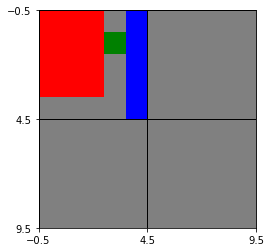

[3, 1, 315]


In [52]:
def debugClassroom():
    print("Classroom:", end = "\n")
    for i in range(class_y):
        print(classroom[i], end = "\n")
    print("\n")
    
def showClassroom():
    # create discrete colormap
    cmap = colors.ListedColormap(['grey','blue','green','red'])
    bounds = [0,1,2,3,4]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(classroom, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    ax.set_xticks(np.arange(-.5, class_x, 5))
    ax.set_yticks(np.arange(-.5, class_y, 5))

    plt.show()
    
showClassroom()
for chair in chairs:
    print(chair)

In [43]:
#Debug
#for i in range(class_y):
#    print(classroom[i], end = "\n")
#print("\n")

for i in range(class_y):
    print(table_placement_ns[i], end = "\n")
print("\n")
for i in range(class_y):
    print(table_placement_ew[i], end = "\n")
print("\n")

[0, 0, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]




True


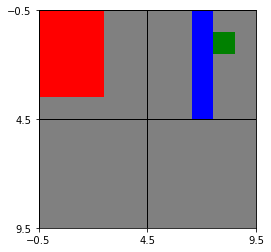

In [44]:
print(addTable())
showClassroom()

In [45]:
#debug
#for i in range(class_y):
#    print(chair_placement[i], end = "\n")

#for i in range(int(len(sol.x)/3)):
#    print(sol.x[i*3:(i+1)*3], end = " ")
#    print(roundAngle(sol.x[i*3+2]))

#for i in range(round(len(guess)/3)):
#    print(round(guess[i*3]), " ", round(guess[i*3+1]))

for i in range(class_y):
    print(classroom[i], end = "\n")
print("\n")

for i in range(class_y):
    print(table_placement_ns[i], end = "\n")
print("\n")
for i in range(class_y):
    print(table_placement_ew[i], end = "\n")
print("\n")

[3, 3, 3, 0, 0, 0, 0, 1, 0, 0]
[3, 3, 3, 0, 0, 0, 0, 1, 2, 0]
[3, 3, 3, 0, 0, 0, 0, 1, 0, 0]
[3, 3, 3, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[0, 0, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]




In [46]:
ten11 = [
    [1,1,1,0,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
]

fifteensq = [
    [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]


adjust = []
for a in range(3):
    y = []
    for b in range(3):
        y.append(1)
    for c in range(7):
        y.append(0)
    adjust.append(y)
for aa in range(7):
    y = []
    for bb in range(10):
        y.append(0) 
    for cc in range(0):
        pass
    adjust.append(y)

In [47]:
#validation
testWall = fifteensq
classXX = len(testWall[0])
classYY = len(testWall)
tableLL = 1
tableWW = 3

#testing
for a in range(6,7):
    tests = 0
    success = 0
    for d in range(4,a):
        for e in range(15):
            numC = a
            if(validInput(classx=classXX,classy=classYY,wallsGrid=testWall,numChairs=a,numTables=d,tableL=tableLL,tableW=tableWW,chair_l=1)):
                classSetup(classx=classXX,classy=classYY,wallsGrid=testWall,numChairs=a,numTables=d,tableL=tableLL,tableW=tableWW)
                optimizerSetup()
                solve()

                tests += 1
                if(solutionIntoClass(sol) and validChair(chairs, testWall) and validTable(d,tableLL,tableWW)):
                    success += 1
                else:
                    print(solutionIntoClass(sol))
                    print(validChair(chairs, testWall))
                    print(validTable(d,tableLL,tableWW))
                    showClassroom()
                            
    print("Students: ", a, ". Pass Ratio: ", success/tests*100, "%. Tests: ", tests, ". Passed Tests: ", success)

KeyboardInterrupt: 

In [54]:
for x in getchairClassroom():
    print(x)
for x in classroom:
    print(x)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 315, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 0, 1, 0, 0, 0, 0, 0]
[3, 3, 3, 2, 1, 0, 0, 0, 0, 0]
[3, 3, 3, 0, 1, 0, 0, 0, 0, 0]
[3, 3, 3, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
